---------------------------------------
Affichage données initiales            xclara.arff


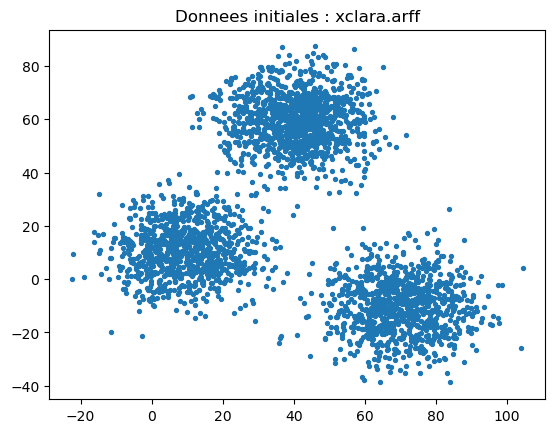

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
 Appel DBSCAN ( 1 ) ... 
Number of clusters :  25 


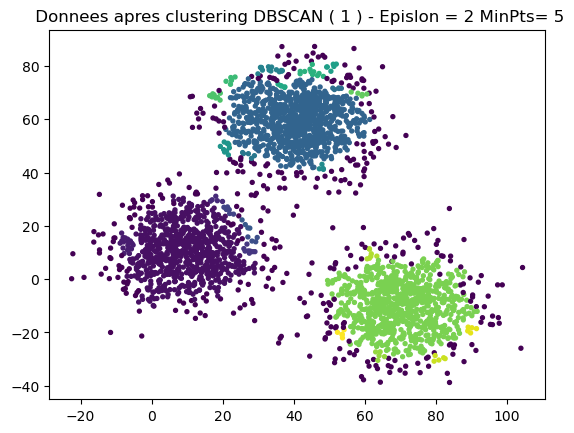

Number of clusters :  968 


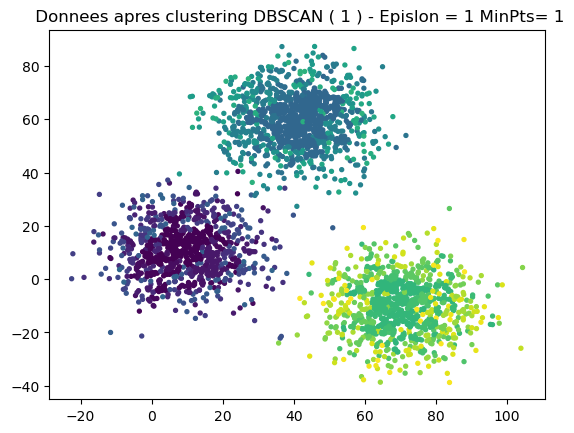

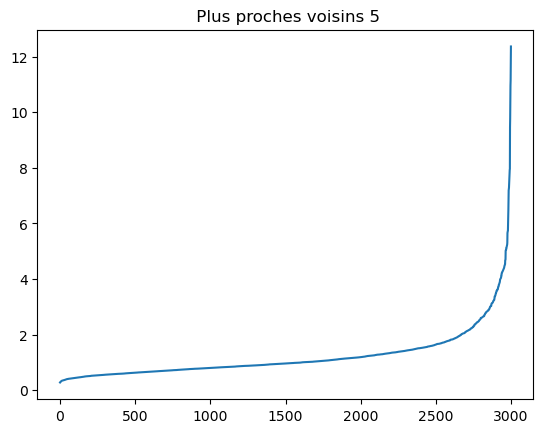

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

##################################################################
# Exemple : DBSCAN Clustering

def transform(data):
    datanp = np.array([[x[0],x[1]] for x in data[0]])
    return datanp

path = '/home/khira/Téléchargements/artificial/'
name="xclara.arff"
databrut1 = arff.loadarff(open(path+str(name), 'r'))
data1=transform(databrut1)

print("---------------------------------------")
print("Affichage données initiales            "+ str(name))

f0 = data1[:,0] # tous les élements de la première colonne
f1 = data1[:,1] # tous les éléments de la deuxième colonne
#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt . show ()


# Run DBSCAN clustering method
# for a given number of parameters eps and min_samples
#
print ( " - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - " )
print ( " Appel DBSCAN ( 1 ) ... " )
tps1 = time . time ()
epsilon = 2
min_pts = 5
model = cluster . DBSCAN ( eps = epsilon , min_samples = min_pts )
model . fit ( data1 )
tps2 = time . time ()
labels = model . labels_

# Number of clusters in labels , ignoring noise if present .
n_clusters = len ( set ( labels ) ) - ( 1 if - 1 in labels else 0 )
#n_noise = list ( labels ) . count ( - 1 )
print ( 'Number of clusters : % d ' % n_clusters )
#print ( 'Number of noise points : % d ' % n_noise )
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Donnees apres clustering DBSCAN ( 1 ) - Epislon = " + str ( epsilon ) + " MinPts= " + str ( min_pts ) )
plt . show ()
#Testez différentes valeurs de ces paramètres afin de déterminer un nombre de clusters qui vous
#semble pertinent.
epsilons = np.linspace(1, 2, 7)
min_pts = [1,2,3,4,5,6,7] 
def silh_DBSCAN(epsilons,min_pts,dataset):
    best_silhouete = -1
    best_eps = epsilons[0]
    best_min_pt = min_pts[0]
    for eps in epsilons:
        for pt in min_pts:                    
            model = cluster.DBSCAN(eps=eps, min_samples=pt)
            model.fit(dataset)
            if best_silhouete < metrics.silhouette_score(dataset,model.labels_,metric='euclidean'):
                best_silhouete  = metrics.silhouette_score(dataset,model.labels_,metric='euclidean')
                best_eps = eps
                best_min_pt = pt
                print("epsilon = "+str(best_eps)+", min_point = "+str(best_min_pt)+", silhouette = "+str(best_silhouete))
#silh_DBSCAN(epsilons,min_pts,data1)

# Distances aux k plus proches voisins
# Donnees dans X
k = 5
neigh = NearestNeighbors ( n_neighbors = k )
neigh . fit ( data1 )
distances , indices = neigh . kneighbors ( data1 )
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np . asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 ,
distances . shape [ 0 ] ) ] )
# trier par ordre croissant
distancetrie = np . sort ( newDistances )
plt . title ( " Plus proches voisins " + str ( k ) )
plt . plot ( distancetrie ) 
plt.show()



